In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = "https://raw.githubusercontent.com/Newbilius/Old-Games_DOS_Game_Gauntlet/master/GAMES.csv"
df = pd.read_csv(url, sep = ';', names = ['Name', 'Genre', 'HTML', 'Year'])
df

,Name,Genre,HTML,Year
0,Alex the Allegator,Arcade,/game/6288.html,не издана
1,Blast Chamber,Action,/game/6354.html,не издана
2,Citizens: Backwater Affairs!,Simulation,/game/7261.html,не издана
3,Corridor 8: Galactic Wars,Action,/game/5645.html,не издана
4,Creation,Simulation,/game/3713.html,не издана
...,...,...,...,...
5256,Hangman,Educational,/game/9806.html,2005
5257,Wanton Destruction,Action,/game/5582.html,2005
5258,Snow Palace,Puzzle,/game/9584.html,2007
5259,Space Rangers for DOS,Arcade,/game/9633.html,2008


In [14]:
years = df['Year'].unique()[1:]
Y_G = {}
for year in years:
    Y_G[year] = len(df[df['Year'] == year])
print(Y_G)

{'1981': 8, '1982': 54, '1983': 85, '1984': 91, '1985': 80, '1986': 115, '1987': 237, '1988': 316, '1989': 442, '1990': 488, '1991': 407, '1992': 526, '1993': 493, '1994': 539, '1995': 483, '1996': 403, '1997': 253, '1998': 82, '1999': 38, '2000': 29, '2001': 30, '2002': 17, '2003': 9, '2004': 4, '2005': 2, '2007': 1, '2008': 2}


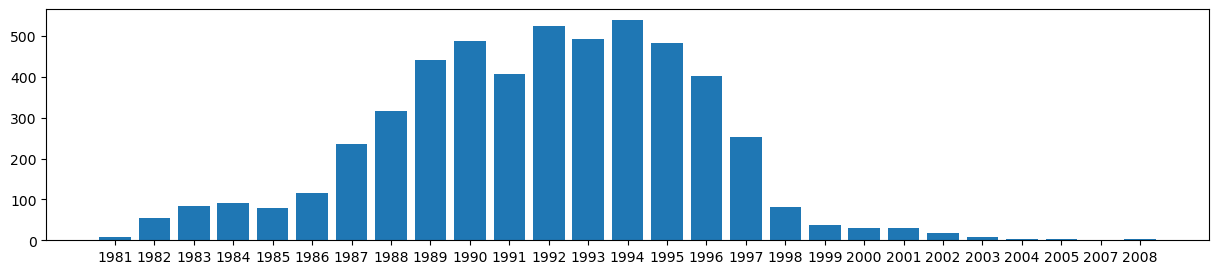

In [15]:
keys = Y_G.keys()
values = Y_G.values()
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
ax.bar(keys, values)
plt.show()

C:\Users\dasda\AppData\Local\Temp\ipykernel_20732\3832881222.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, column='Genre', by='Year', edgecolor = 'white')


array([[<AxesSubplot:title={'center':'1981'}>,
        <AxesSubplot:title={'center':'1982'}>,
        <AxesSubplot:title={'center':'1983'}>,
        <AxesSubplot:title={'center':'1984'}>,
        <AxesSubplot:title={'center':'1985'}>],
       [<AxesSubplot:title={'center':'1986'}>,
        <AxesSubplot:title={'center':'1987'}>,
        <AxesSubplot:title={'center':'1988'}>,
        <AxesSubplot:title={'center':'1989'}>,
        <AxesSubplot:title={'center':'1990'}>],
       [<AxesSubplot:title={'center':'1991'}>,
        <AxesSubplot:title={'center':'1992'}>,
        <AxesSubplot:title={'center':'1993'}>,
        <AxesSubplot:title={'center':'1994'}>,
        <AxesSubplot:title={'center':'1995'}>],
       [<AxesSubplot:title={'center':'1996'}>,
        <AxesSubplot:title={'center':'1997'}>,
        <AxesSubplot:title={'center':'1998'}>,
        <AxesSubplot:title={'center':'1999'}>,
        <AxesSubplot:title={'center':'2000'}>],
       [<AxesSubplot:title={'center':'2001'}>,
        <

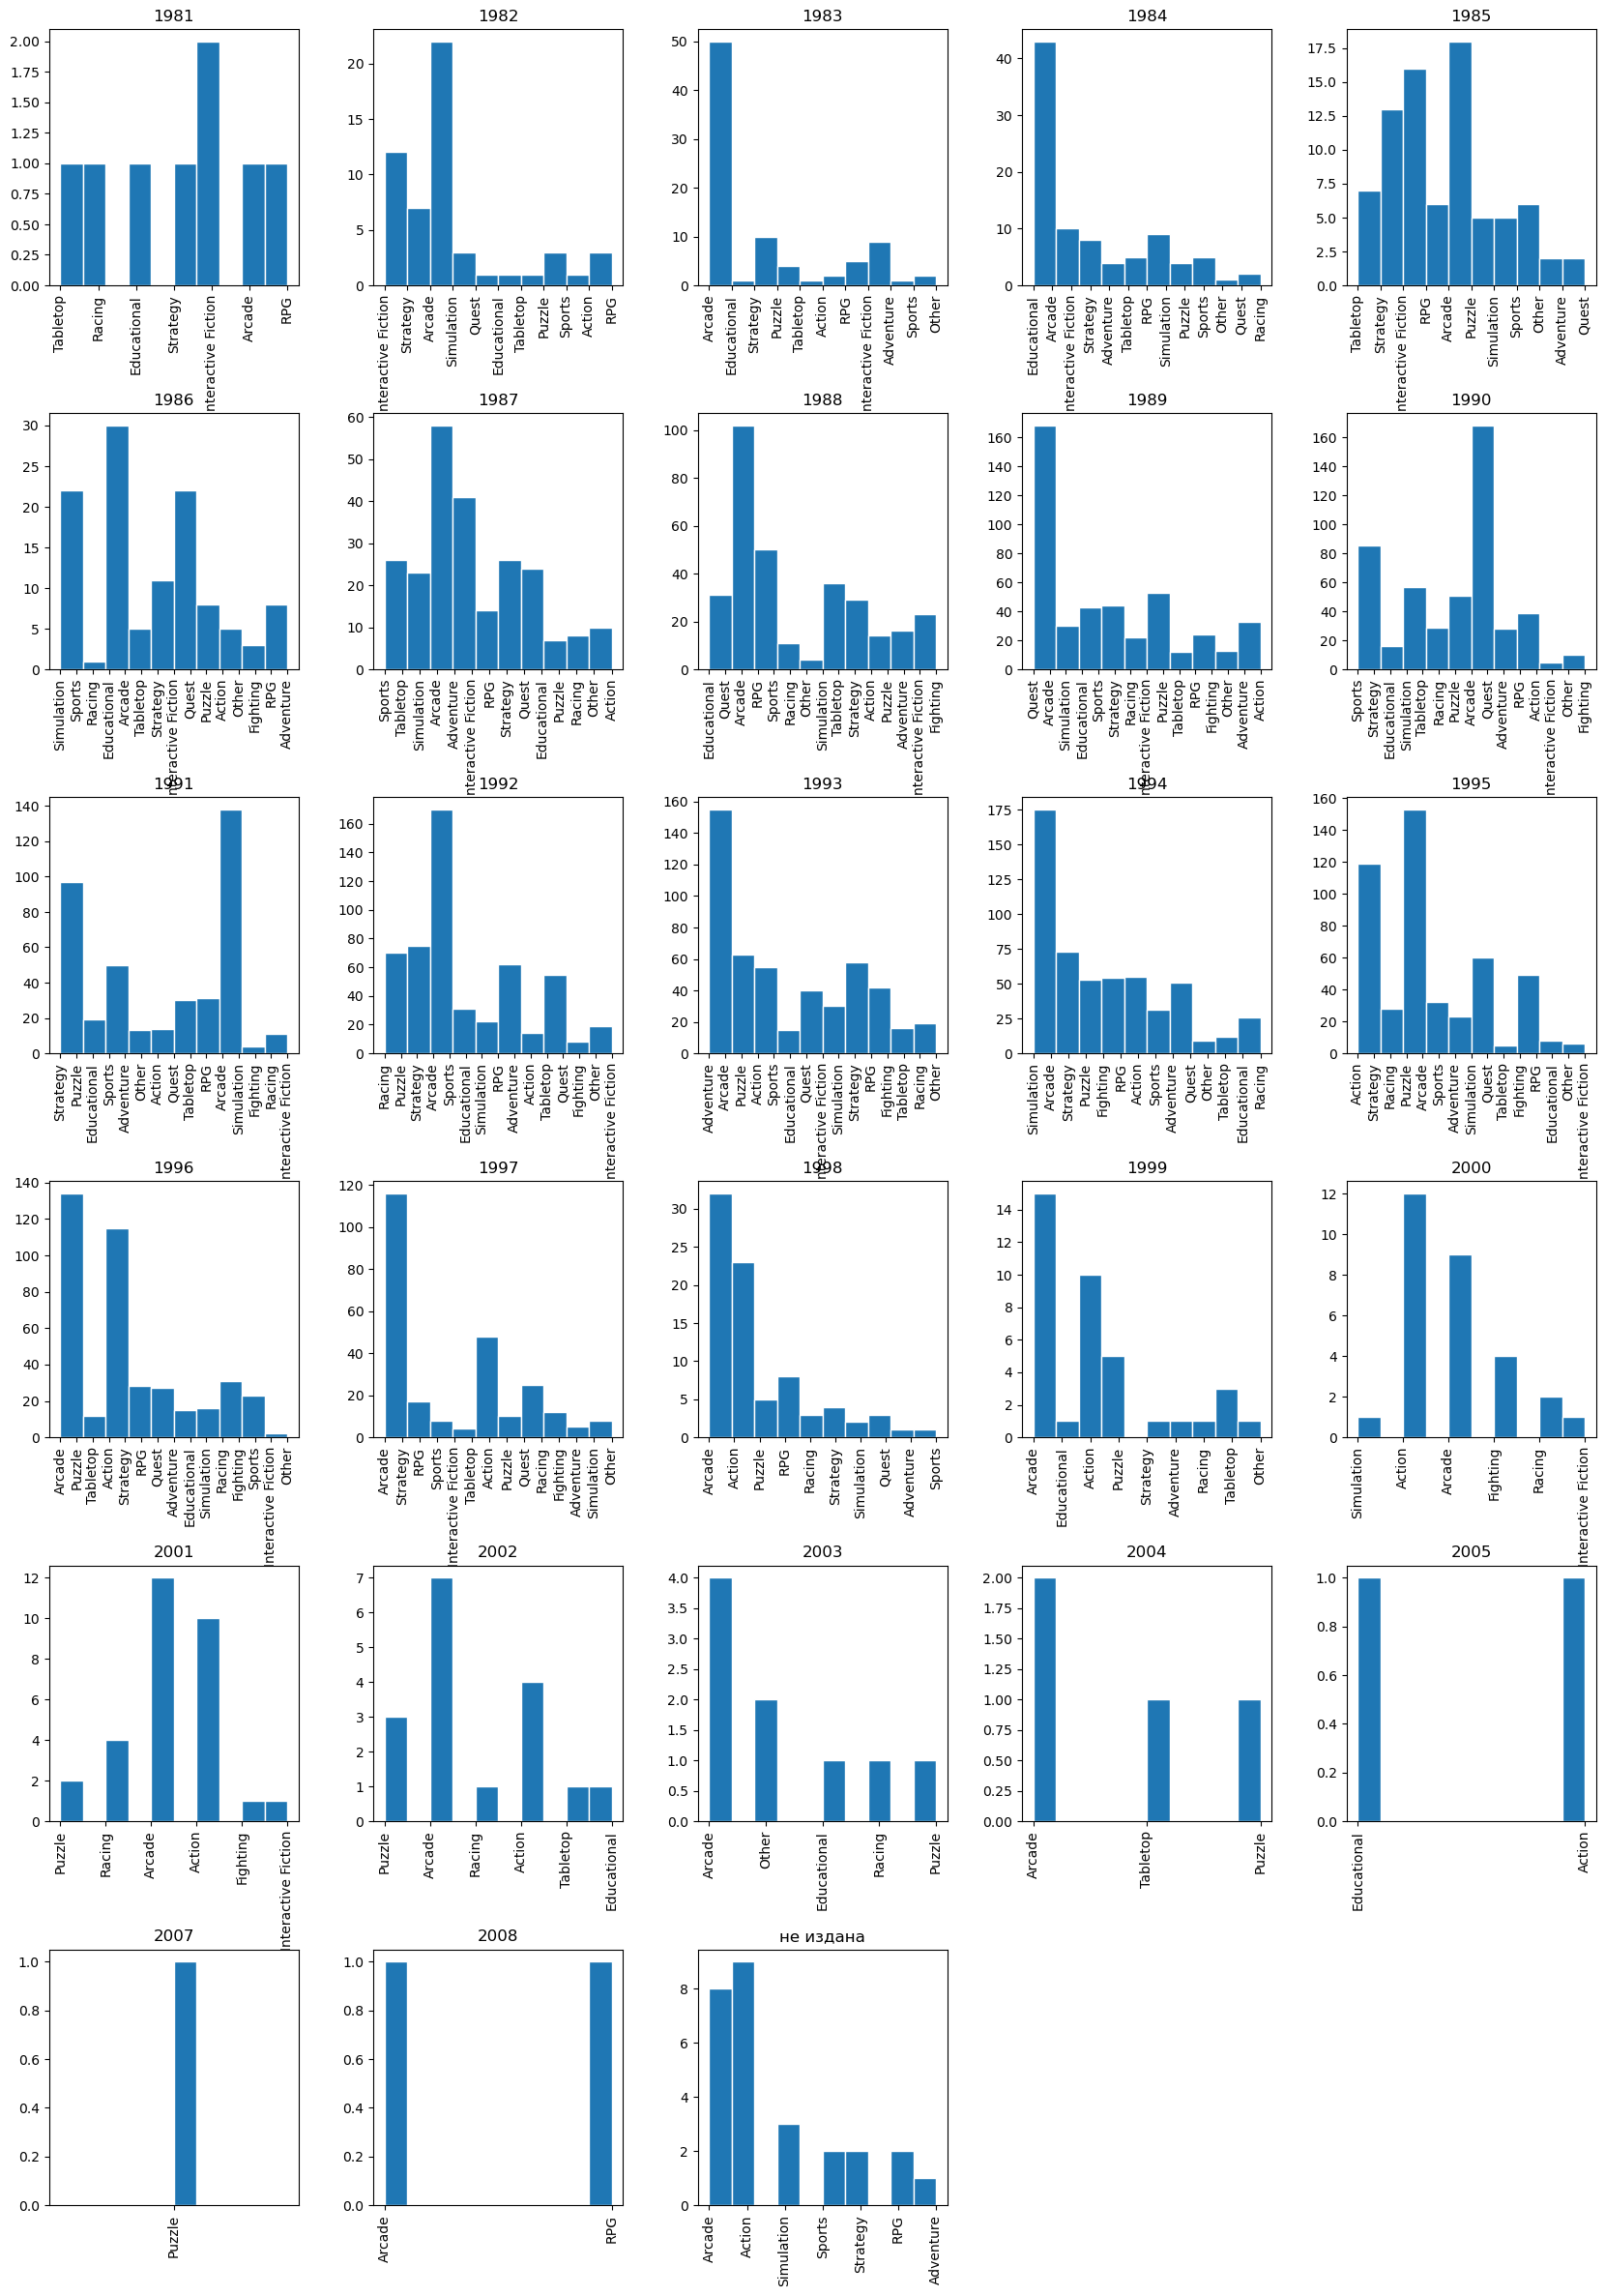

In [16]:
fig = plt.figure(figsize = (20,30))
ax = fig.gca()
df.hist(ax = ax, column='Genre', by='Year', edgecolor = 'white')

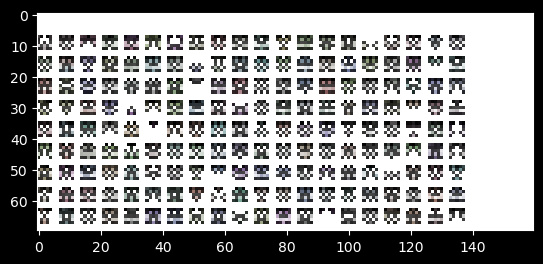

In [24]:
from PIL import Image
import random
import math
import colorsys
import copy


def generate(mask, color_variations=0.2, colored=True, brightness_noise=0.3, edge_brightness=0.3,
             saturation=0.2, mirror=True):

    new_mask = copy.deepcopy(mask)
    height = len(new_mask)
    width = len(new_mask[0])

    saturation = max(min(random.random() * saturation, 1), 0)
    hue = random.random()

    new_mask = _generate_body(new_mask, width, height)

    if mirror:
        new_mask, width, height = _mirror_body(new_mask)

    new_mask = _generate_edges(new_mask, width, height)
    new_mask = _apply_colors(new_mask, color_variations, colored, brightness_noise, saturation,
                             edge_brightness, hue, height, width)

    return _array_to_image(new_mask)


def generate_canvas(mask, color_variations=0.2, colored=True, brightness_noise=0.3, edge_brightness=0.3,
                    saturation=0.2, mirror=True, n=200, nr_columns=20):
    images = [generate(mask, color_variations, colored, brightness_noise, edge_brightness, saturation, mirror)
              for _ in range(n)]

    space = 2

    background_width = ((len(mask[0]) if not mirror else len(mask[0]) * 2) * nr_columns) + (nr_columns * space)
    background_height = int(len(mask) * n / nr_columns) + int(n / nr_columns * space)
    background = Image.new('RGB', (background_width, background_height), (255, 255, 255, 255))
    offset = [0, 0]

    for index, image in enumerate(images):
        img_w, img_h = image.size

        if index % nr_columns == 0:
            offset[1] += img_h + space
            offset[0] = 0

        background.paste(image, tuple(offset))
        offset[0] += img_w + space

    return background


def _generate_body(mask, width, height):
    for x in range(width):
        for y in range(height):
            if mask[y][x] == 1:
                mask[y][x] = round(random.random() > 0.5)
            elif mask[y][x] == 2:
                if random.random() > 0.5:
                    mask[y][x] = 1
                else:
                    mask[y][x] = -1

    return mask


def _mirror_body(mask):
    for i in range(len(mask)):
        mask[i].extend(mask[i][1::-1])
    return mask, 5, 5


def _generate_edges(mask, width, height):
    for x in range(width):
        for y in range(height):
            if mask[y][x] == 1:
                if x - 1 >= 0 and mask[y][x - 1] == 0:
                    mask[y][x - 1] = -1
                if x + 1 < width and mask[y][x + 1] == 0:
                    mask[y][x + 1] = -1
                if y - 1 >= 0 and mask[y - 1][x] == 0:
                    mask[y - 1][x] = -1
                if y + 1 < height and mask[y + 1][x] == 0:
                    mask[y + 1][x] = -1

    return mask


def _apply_colors(mask, color_variations, colored, brightness_noise, saturation,
                  edge_brightness, hue, height, width):
    ulen = height
    vlen = width

    for u in range(ulen):
        is_new_color = abs((random.random() * 2 - 1)
                           + (random.random() * 2 - 1)
                           + (random.random() * 2 - 1)) / 3

        if is_new_color > (1 - color_variations):
            hue = random.random()

        for v in range(vlen):
            val = mask[u][v]

            rgb = {"r": 1, "g": 1, "b": 1}

            if val != 0:
                if colored:
                    brightness = (math.sin((u / ulen) * math.pi) *
                                  (1 - brightness_noise) + random.random() * brightness_noise)
                    rgb_vals = colorsys.hls_to_rgb(hue, brightness, saturation)
                    rgb['r'] = rgb_vals[0]
                    rgb['g'] = rgb_vals[1]
                    rgb['b'] = rgb_vals[2]

                    if val == -1:
                        rgb['r'] *= edge_brightness
                        rgb['g'] *= edge_brightness
                        rgb['b'] *= edge_brightness

                else:
                    if val == -1:
                        rgb = {"r": 0, "g": 0, "b": 0}

            mask[u][v] = (round(rgb['r'] * 255),
                               round(rgb['g'] * 255),
                               round(rgb['b'] * 255))

    return mask

def _array_to_image(mask):
    width, height = len(mask[0]), len(mask)
    data = sum(mask, [])
    im = Image.new('RGB', (width, height), 1)
    im.putdata(data)
    return im

plt.imshow(generate_canvas([[1, 1, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 1]]))
#plt.imshow(generate([[1, 1, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 1,]]))

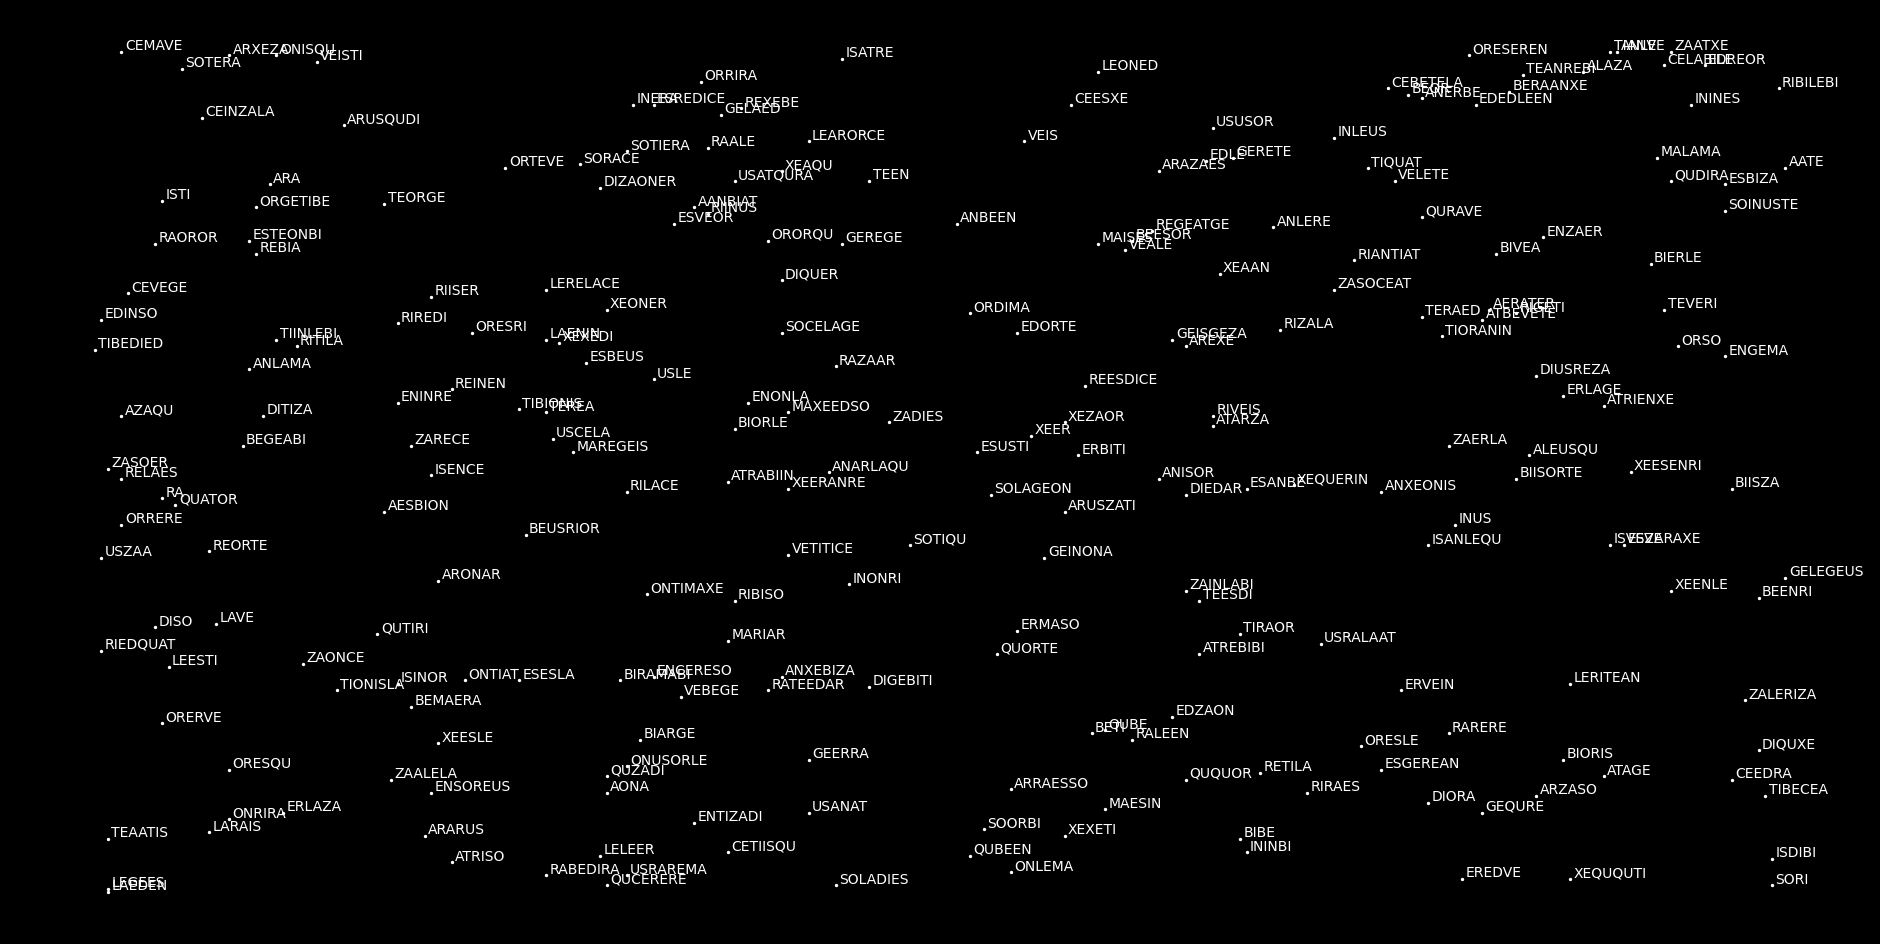

In [25]:
import matplotlib.pyplot as plt
import matplotlib
import ctypes

seed = [0x5A4A, 0x0248, 0xB753]
pairs = '..LEXEGEZACEBISO' \
        'USESARMAINDIREA.' \
        'ERATENBERALAVETI' \
        'EDORQUANTEISRION'

x = list()
y = list()
n = list()


def tweak_seed():
    temp = sum(seed) % 0x10000
    seed[0] = seed[1]
    seed[1] = seed[2]
    seed[2] = temp
    return 2 * ((seed[1] >> 8) & 31)


def generate_system():
    longname_flag = seed[0] & 64
    name = list()
    x_coord = seed[1] >> 8
    y_coord = 255 - seed[0] >> 8

    pairs_num = [tweak_seed() for _ in range(4)]
    if not longname_flag:
        pairs_num.pop()
    for i in pairs_num:
        name.append(pairs[i])
        name.append(pairs[i + 1])

    name = ''.join([ch for ch in name if ch != '.'])
    return x_coord, y_coord, name


def main():
    matplotlib.style.use('dark_background')
    plt.figure(figsize=(24, 12))
    for i in range(256):
        tx, ty, tn = generate_system()
        x.append(tx)
        y.append(ty)
        n.append(tn)

    plt.scatter(x, y, s=2, color='white')
    for i, txt in enumerate(n):
        plt.annotate(txt, (x[i] + 0.5, y[i] + 0.5))

    plt.axis('off')
    plt.show()


if __name__ == '__main__':
    main()